In [85]:
import os
import cv2
import random
import imutils
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm
from scipy import ndimage
from skimage.morphology import watershed
from skimage.feature import peak_local_max

In [21]:
dataset_path = os.path.join("datasets", "train_small_10", "train")

dataset = torchvision.datasets.ImageFolder(root=dataset_path)

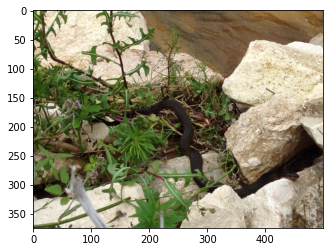

In [82]:
(img, label) = random.choice(dataset)
img = np.array(img)

plt.imshow(img)

In [83]:
def get_foreground(image):
    img = np.array(image)
    mask = np.zeros(img.shape[:2],np.uint8)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    rect = (50,50,450,290)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]

    return img

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:14<00:00,  7.24s/it]


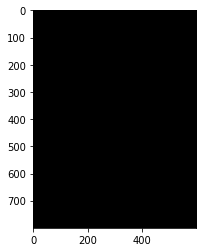

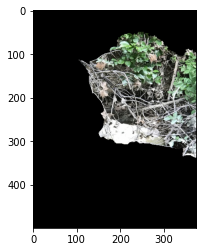

In [96]:
total_samp = 2
test_path = os.path.join("test")

if not os.path.isdir(test_path):
    os.makedirs(test_path)

for i in tqdm(range(total_samp), total=total_samp):
    (img, label) = random.choice(dataset)
    img = np.array(img)

    fg = get_foreground(img)

    plt.figure()
    plt.imshow(fg)
    
    actual_image_path = os.path.join(test_path, "{}_original.png".format(i))
    fg_image_path = os.path.join(test_path, "{}_fg.png".format(i))

    plt.imsave(actual_image_path, img)
    plt.imsave(fg_image_path, fg)